# CodSoft Data Science Intern || Sales Predection Model

### Importing the required libraries

In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

### Loading the data into a DataFrame to start working with

In [64]:
# Load the dataset
df = pd.read_csv('/kaggle/input/advertising-dataset/advertising.csv')

# Display the first few rows of the dataset
df.head()


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


### Cleaning the data 

In [68]:
# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())


Missing values in the dataset:
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [70]:
# Check for duplicated rows
print("\nDuplicated values in the dataset:")
print(df.duplicated().sum())


Duplicated values in the dataset:
0


### Exploring the data

In [72]:
# Summary statistics
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


C:\Users\Fc\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


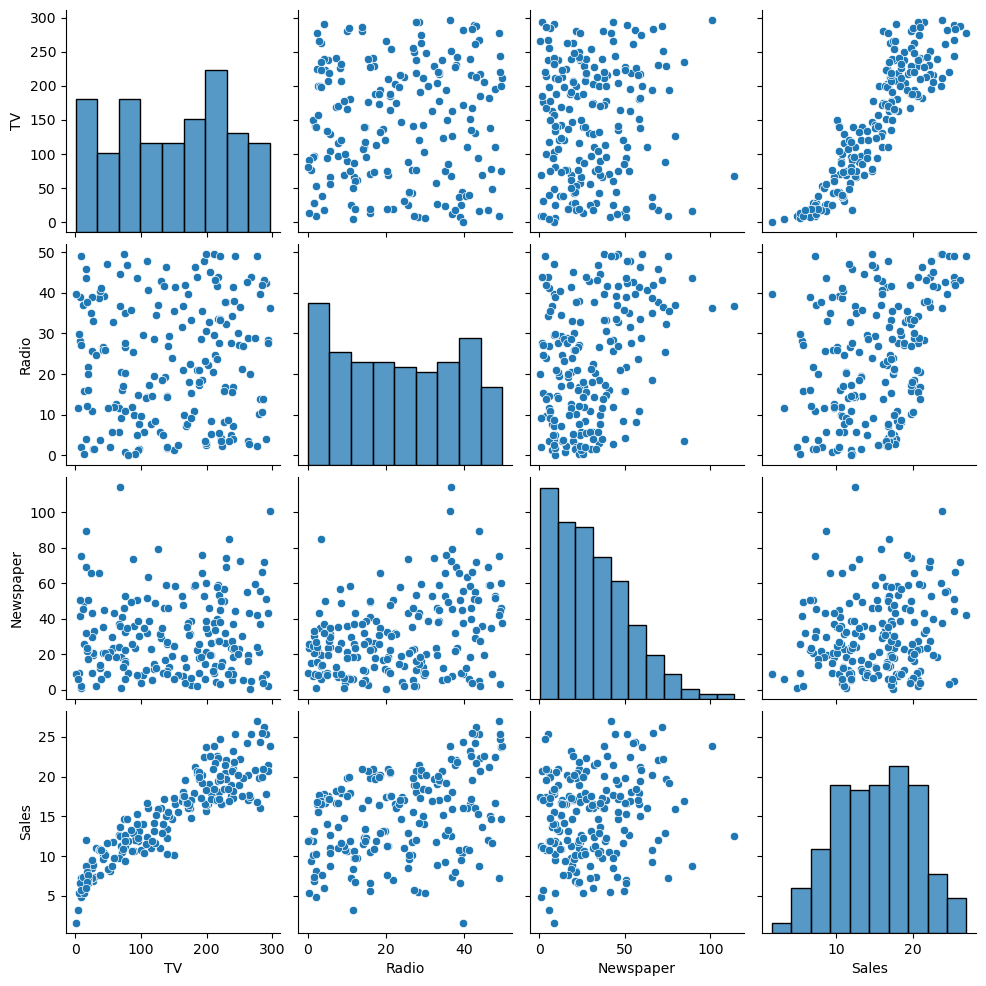

In [84]:
# Pairplot to visualize relationships
sns.pairplot(df)
plt.show()

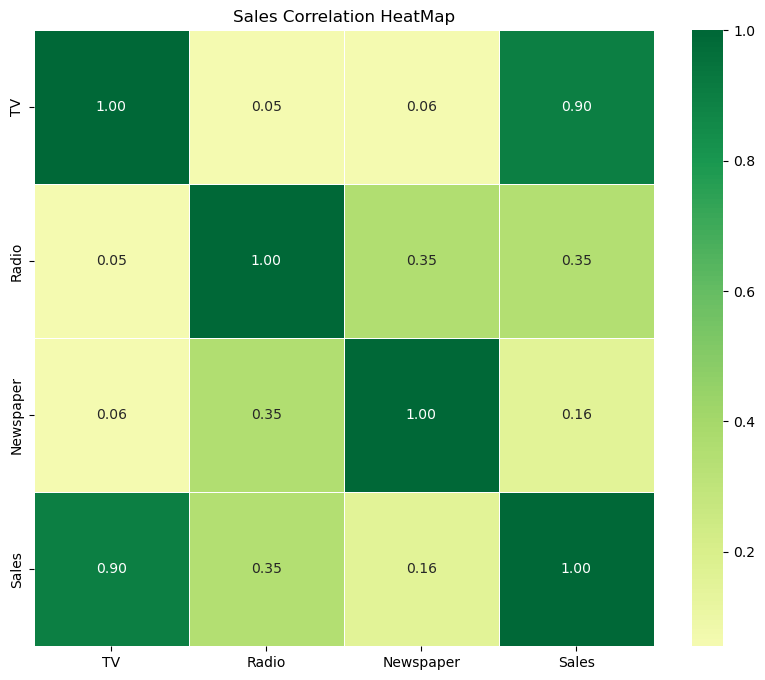

In [78]:
#heatmap for correlation
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', fmt=".2f", center=0, linewidths=0.5)

plt.title('Sales Correlation HeatMap')
plt.show()

## Iam sure that the most effective factor of the sales is the TV

### Now the phase of the modeling

In [105]:
#scale the features
features = ['TV', 'Radio', 'Newspaper']
scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])
df.head()

,TV,Radio,Newspaper,Sales
0,0.775786,0.762097,0.605981,22.1
1,0.148123,0.792339,0.394019,10.4
2,0.055800,0.925403,0.606860,12.0
3,0.509976,0.832661,0.511873,16.5
4,0.609063,0.217742,0.510994,17.9


In [107]:
# Assuming df is your DataFrame and 'Sales' is your target variable
X = df.drop('Sales', axis=1)
y = df['Sales']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize different regression models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet Regression": ElasticNet(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Regressor": SVR()
}

# Dictionary to store results
results = {}

# Loop through models, train them, predict, and calculate metrics
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {'MSE': mse, 'R-squared': r2}

# Convert results to a DataFrame for easier viewing
results_df = pd.DataFrame(results).T

# Display the results
print(results_df)
    

                                MSE  R-squared
Linear Regression          2.907757   0.905901
Ridge Regression           3.094442   0.899860
Lasso Regression          20.710157   0.329792
ElasticNet Regression     27.566398   0.107915
Decision Tree              3.662250   0.881485
Random Forest              1.401065   0.954660
Gradient Boosting          1.244662   0.959721
Support Vector Regressor   3.470141   0.887702


## In this case, Gradient Boosting has the lowest MSE (1.244662) and a high R-squared (0.959721), making it likely the best model among those tested.

### Visualize the results on the model

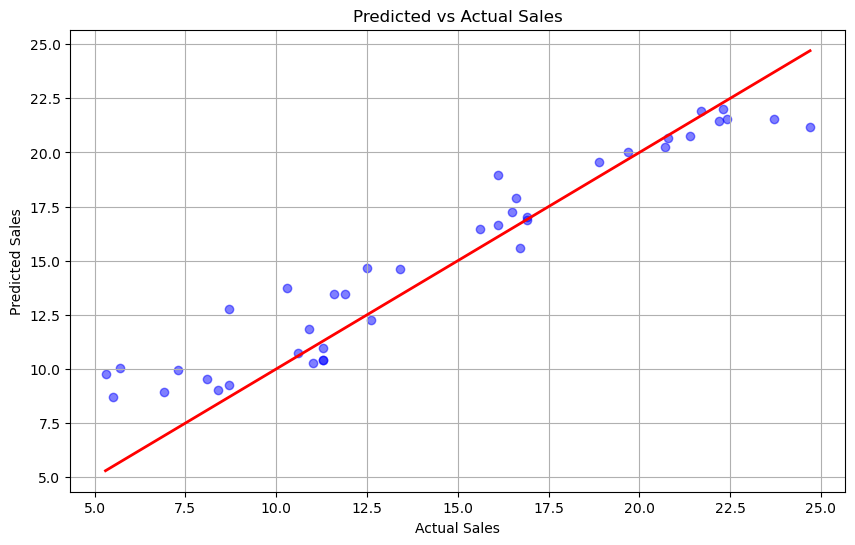

In [110]:
import matplotlib.pyplot as plt

# Assuming 'y_test' is the actual values and 'y_pred' is the predicted values from the best model

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)  # Line for perfect prediction
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Predicted vs Actual Sales')
plt.grid(True)
plt.show()
